In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [2]:
url="https://raw.githubusercontent.com/mfarrokhrouz/Crime_Against_Women/main/Resources/crimes_against_women_2001-2014.csv"
data=pd.read_csv(url)
data.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [3]:
# Remove the unnamed column in the data set
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10677 non-null  object
 1   DISTRICT                                             10677 non-null  object
 2   Year                                                 10677 non-null  int64 
 3   Rape                                                 10677 non-null  int64 
 4   Kidnapping and Abduction                             10677 non-null  int64 
 5   Dowry Deaths                                         10677 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 7   Insult to modesty of Women                           10677 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10677 non-null  int64 


In [5]:
# Statistical analysis of the data used in this study
data.describe().style.background_gradient(cmap='Spectral_r')

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [6]:
# Checking the null values in the data set
data.isna().sum()/len(data)*100

STATE/UT                                               0.0
DISTRICT                                               0.0
Year                                                   0.0
Rape                                                   0.0
Kidnapping and Abduction                               0.0
Dowry Deaths                                           0.0
Assault on women with intent to outrage her modesty    0.0
Insult to modesty of Women                             0.0
Cruelty by Husband or his Relatives                    0.0
Importation of Girls                                   0.0
dtype: float64

In [7]:
# The name and the number of unique states within the data set
num=data['STATE/UT'].nunique()
print(f"The number of unique states are {num} states.")

The number of unique states are 72 states.


In [8]:
# Showing the name of the states to check if anything is repeated 
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [9]:
# Converting the name of the staes into upper case names
data['STATE/UT']=data['STATE/UT'].apply(lambda x: x.upper())
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'A&N ISLANDS',
       'D&N HAVELI', 'DELHI UT', 'TELANGANA'], dtype=object)

In [10]:
# Check again the number of states
num2=data['STATE/UT'].nunique()
print(f"The number of unique states are {num2} states.")

The number of unique states are 39 states.


In [11]:
# Apply the changes to make the duplicate data into a unique name
data['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
data['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
data['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)
num3=data['STATE/UT'].nunique()
print(f"The number of unique states are {num3} states.")
data['STATE/UT'].unique()

The number of unique states are 36 states.


array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

## Crime Changes through the Years

In [13]:
def func(all_cases):

    for i in list(data.columns)[2:]:
        all_cases[i]=data.groupby(['Year'])[i].sum()
        
    return all_cases

all_cases=pd.DataFrame()
all_cases=func(all_cases)
all_cases

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,,
2001,1432716,32150,29290,13702,68248,19492,98340,228
2002,1439438,32746,29012,13644,67886,20310,98474,152
2003,1458184,31694,26592,12416,65878,24650,101406,92
2004,1460916,36466,31156,14052,69134,20002,116242,178
2005,1469665,36718,31500,13574,68350,19968,116638,298
2006,1484440,38696,34828,15236,73234,19932,126256,134
2007,1491201,41474,40832,16186,77468,21900,151860,122
2008,1528088,42934,45878,16344,80826,24428,162688,134
2009,1540903,42794,51482,16766,77422,22018,179092,96


In [15]:
#Totzl Number of cases in each year
total_crimes = pd.DataFrame(all_cases.sum(axis=1),columns=['Total Number of Cases'])
total_crimes

,Total Number of Cases
Year,
2001,1694166
2002,1701662
2003,1720912
2004,1748146
2005,1756711
2006,1792756
2007,1841043
2008,1901320
2009,1930573


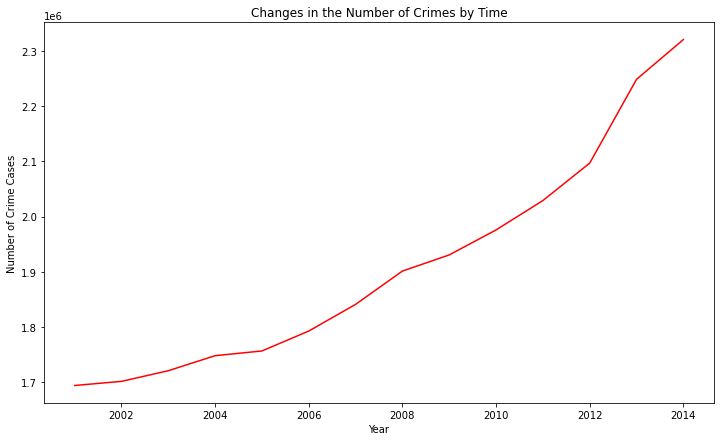

In [18]:
# Create a line chart for year column
plt.figure(figsize=(12,7))
total_crimes['Total Number of Cases'].plot(kind='line',color='red')
plt.title("Changes in the Number of Crimes by Time")
plt.xlabel("Year")
plt.ylabel("Number of Crime Cases")
plt.show()